In [1]:
import numpy as np
import os
import pandas as pd

from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

from Siamese_model import SiameseTrainer

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [2]:
def load_and_preprocess_image(path, target_size=(96, 96)):
    img = load_img(path, target_size=target_size, color_mode='grayscale', interpolation='lanczos')
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0  # Normalize to [0,1]
    return img

def load_pairs_and_labels(csv_path, image_base_path):
    df = pd.read_csv(csv_path)
    pair_images = []
    labels = df['label'].values
    
    for idx, row in df.iterrows():
        img1_path = os.path.join(image_base_path, row['image_1'])
        img2_path = os.path.join(image_base_path, row['image_2'])
        
        img1 = load_and_preprocess_image(img1_path)
        img2 = load_and_preprocess_image(img2_path)
        
        pair_images.append(np.concatenate([img1, img2], axis=0))
    
    # Convert list of pairs to a numpy array
    pairs = np.array(pair_images)
    
    pairs = pairs.reshape(-1, 2, *pairs.shape[2:])
    
    return pairs, labels


In [3]:
def new_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=input_shape, kernel_regularizer=l2(0.001)),
        MaxPooling2D((2,2)),
        Dropout(0.25),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Conv2D(256, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(1024, activation='relu'),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

In [4]:
input_shape = (96, 96, 1)
num_classes = 3

In [5]:
model_new = new_model(input_shape, num_classes)

In [6]:
# Define path for quater dataset
image_base_path = '../OpenSARShip/Categories/'

train_csv_path = os.getcwd() + "/Split_quater_siamese/train_pairs.csv"
val_csv_path = os.getcwd() + "/Split_quater_siamese/val_pairs.csv"
test_csv_path = os.getcwd() + "/Split_quater_siamese/test_pairs.csv"

# Load and preprocess the data
print("Loading and preprocessing the data train")
train_pairs, train_labels = load_pairs_and_labels(train_csv_path, image_base_path)
print("Loading and preprocessing the data val")
val_pairs, val_labels = load_pairs_and_labels(val_csv_path, image_base_path)
print("Loading and preprocessing the data test")
test_pairs, test_labels = load_pairs_and_labels(test_csv_path, image_base_path)

Loading and preprocessing the data train
Loading and preprocessing the data val
Loading and preprocessing the data test


Creating the SiameseTrainer
Compiling the model
Training the model
Epoch 1/50
383/383 [==============================] - ETA: 0s - loss: 0.6938 - accuracy: 0.5630
Epoch 1: val_accuracy improved from -inf to 0.56459, saving model to Siam_batch32_quater_data_interpol_1.pth
INFO:tensorflow:Assets written to: Siam_batch32_quater_data_interpol_1.pth\assets


INFO:tensorflow:Assets written to: Siam_batch32_quater_data_interpol_1.pth\assets


383/383 [==============================] - 99s 255ms/step - loss: 0.6938 - accuracy: 0.5630 - val_loss: 0.6930 - val_accuracy: 0.5646 - lr: 1.0000e-04
Epoch 2/50
383/383 [==============================] - ETA: 0s - loss: 0.6913 - accuracy: 0.5738
Epoch 2: val_accuracy did not improve from 0.56459
383/383 [==============================] - 97s 254ms/step - loss: 0.6913 - accuracy: 0.5738 - val_loss: 0.6922 - val_accuracy: 0.5602 - lr: 1.0000e-04
Epoch 3/50
383/383 [==============================] - ETA: 0s - loss: 0.6900 - accuracy: 0.5735
Epoch 3: val_accuracy did not improve from 0.56459
383/383 [==============================] - 98s 257ms/step - loss: 0.6900 - accuracy: 0.5735 - val_loss: 0.6905 - val_accuracy: 0.5602 - lr: 1.0000e-04
Epoch 4/50
383/383 [==============================] - ETA: 0s - loss: 0.6881 - accuracy: 0.5795
Epoch 4: val_accuracy improved from 0.56459 to 0.57329, saving model to Siam_batch32_quater_data_interpol_1.pth
INFO:tensorflow:Assets written to: Siam_batch

INFO:tensorflow:Assets written to: Siam_batch32_quater_data_interpol_1.pth\assets


383/383 [==============================] - 95s 249ms/step - loss: 0.6881 - accuracy: 0.5795 - val_loss: 0.6889 - val_accuracy: 0.5733 - lr: 1.0000e-04
Epoch 5/50
383/383 [==============================] - ETA: 0s - loss: 0.6878 - accuracy: 0.5723
Epoch 5: val_accuracy did not improve from 0.57329
383/383 [==============================] - 96s 250ms/step - loss: 0.6878 - accuracy: 0.5723 - val_loss: 0.6890 - val_accuracy: 0.5602 - lr: 1.0000e-04
Epoch 6/50
383/383 [==============================] - ETA: 0s - loss: 0.6868 - accuracy: 0.5747
Epoch 6: val_accuracy did not improve from 0.57329
383/383 [==============================] - 92s 241ms/step - loss: 0.6868 - accuracy: 0.5747 - val_loss: 0.6885 - val_accuracy: 0.5602 - lr: 1.0000e-04
Epoch 7/50
383/383 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.5781
Epoch 7: val_accuracy did not improve from 0.57329
383/383 [==============================] - 97s 254ms/step - loss: 0.6857 - accuracy: 0.5781 - val_loss: 0.

INFO:tensorflow:Assets written to: Siam_batch32_quater_data_interpol_1.pth\assets


New best model with validation accuracy 0.5602322220802307 saved as Siam_batch32_quater_data_interpol_1.pth
Plotting the training history


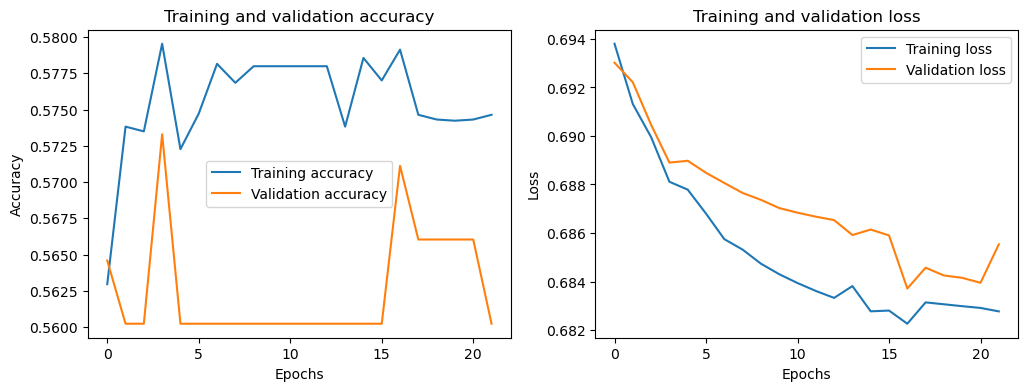

Evaluating the model
42/42 [==============================] - 2s 49ms/step - loss: 0.6774 - accuracy: 0.6018
Test accuracy:  0.6018099784851074


In [7]:
print("Creating the SiameseTrainer")
siamese_network = SiameseTrainer(base_model_func=new_model, input_shape=(96, 96, 1), num_classes=num_classes)
# siamese_network = SiameseTrainer(base_model_func=new_model, input_shape=(96, 96, 1), num_classes=num_classes)

# Set the optimizer
initial_learning_rate = 0.0001
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate,
#     decay_steps=1000,
#     decay_rate=0.96,
#     staircase=True)

optimizer = Adam(learning_rate=initial_learning_rate)

# Compile the model
print("Compiling the model")
# siamese_network.compile_model(optimizer='adam', loss='binary_crossentropy')
siamese_network.compile_model(optimizer=optimizer, loss='binary_crossentropy')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode = 'min', restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, mode = 'min')

# Train the model
print("Training the model")
# siamese_network.train_model(train_pairs, train_labels, val_pairs, val_labels, epochs=10, batch_size=32)
siamese_network.train_model(train_pairs, train_labels, val_pairs, val_labels, epochs=50, batch_size=32, model_save_name='Siam_batch32_quater_data_interpol_1.pth',
                            callbacks=[early_stopping, reduce_lr])


# Plot training history
print("Plotting the training history")
siamese_network.plot_training()

# Evaluate the model
print("Evaluating the model")
siamese_network.evaluate_model(test_pairs, test_labels)


In [8]:
# print(os.getcwd())
# print(os.path.join(os.getcwd(), '../OpenSARShip/Categories/'))
base_dir = os.path.abspath('../OpenSARShip/Categories/')
print(base_dir)

c:\Users\Julia\Projets_ENSTA\Projet_Systeme_3A\OpenSARShip\Categories


In [9]:
def get_category_from_path(file_path):
    '''Extracts the category from the file path based on your directory structure'''
    # Extracts the category from the file path based on the directory structure
    category = file_path.split('\\')[0]
    return category


In [10]:
# Reference of the images
# image_base_path = '../OpenSARShip/Categories/'
image_base_path = os.path.abspath('../OpenSARShip/Categories/')

reference_images = {
    'Tanker' : [load_and_preprocess_image(image_base_path + '/Tanker/Tanker_Visual_Cargo_x6945_y4168_vv.tif'),
                load_and_preprocess_image(image_base_path + '/Tanker/Tanker_Visual_Cargo_x52546_y8377_vv.tif')],
    'Container Ship' : [load_and_preprocess_image(image_base_path + '/Container Ship/ContainerShip_Visual_Cargo_x186_y2504_vv.tif'),
                        load_and_preprocess_image(image_base_path + '/Container Ship/ContainerShip_Visual_Cargo_x215_y7247_vv.tif')],
    'Bulk Carrier' : [load_and_preprocess_image(image_base_path + '/Bulk Carrier/BulkCarrier_Visual_Cargo_x48_y7700_vv.tif'),
                      load_and_preprocess_image(image_base_path + '/Bulk Carrier/BulkCarrier_Visual_Cargo_x123_y5601_vv.tif')]
}

In [11]:
def classify_test_image(test_image, siamese_model, reference_images):
    '''Classifies the test image using the Siamese model and reference images provided'''
    highest_similarity = 0
    predicted_category = None
    
    for category, refs in reference_images.items():
        category_similarity = 0
        
        for ref_img in refs:
            # Ensure both test_image and ref_img are 4-dimensional
            # (1, Height, Width, Channels)
            similarity = siamese_model.predict([test_image, ref_img])[0][0]
            category_similarity += similarity
        
        # Calculate average similarity for this category
        category_similarity /= len(reference_images[category])
        
        if category_similarity > highest_similarity:
            highest_similarity = category_similarity
            predicted_category = category
            
    return predicted_category



In [12]:
test_df = pd.read_csv(os.path.join(os.getcwd(), 'Split_quater_siamese/test_pairs.csv'))


predictions = []
true_categories = []

for index, row in test_df.iterrows():
    # img1_path = os.path.join('OpenSARShip/Categories', row['image_1'])
    img1_path = os.path.join(os.path.abspath('../OpenSARShip/Categories'), row['image_1'])
    img1_category = get_category_from_path(row['image_1'])
    img1 = load_and_preprocess_image(img1_path)
    
    predicted_category = classify_test_image(img1, siamese_network.model, reference_images)
    
    predictions.append(predicted_category)
    true_categories.append(img1_category)



1/1 [==============================] - 0s 23ms/step


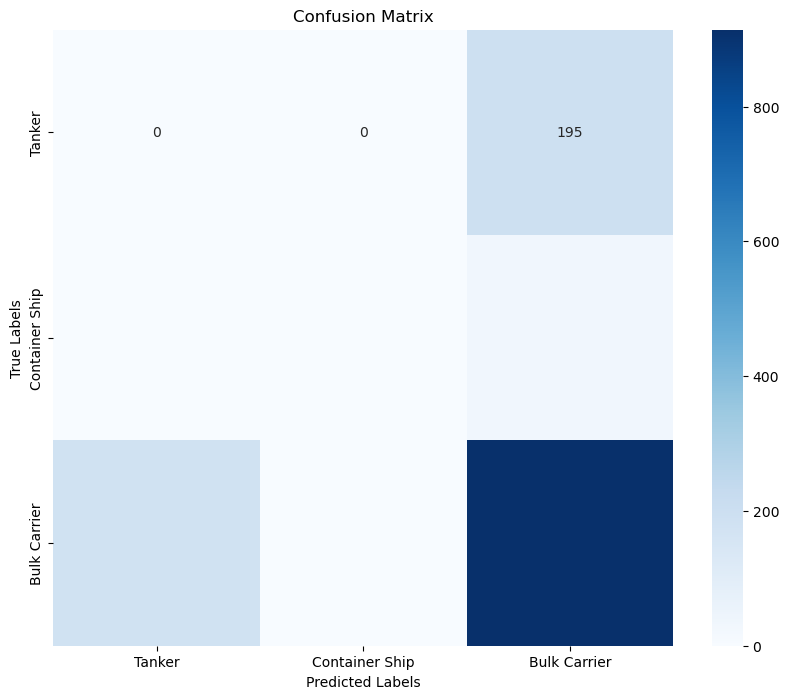

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming true_categories holds the true class labels, and predictions holds the predicted labels from your model
conf_matrix = confusion_matrix(true_categories, predictions, labels=list(reference_images.keys()))
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=list(reference_images.keys()), yticklabels=list(reference_images.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [14]:
print(classification_report(true_categories, predictions, target_names=list(reference_images.keys())))


                precision    recall  f1-score   support

        Tanker       0.80      0.83      0.82      1095
Container Ship       0.00      0.00      0.00        36
  Bulk Carrier       0.00      0.00      0.00       195

      accuracy                           0.69      1326
     macro avg       0.27      0.28      0.27      1326
  weighted avg       0.66      0.69      0.67      1326



c:\Users\Julia\anaconda3\envs\tensorflow_new\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Julia\anaconda3\envs\tensorflow_new\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Julia\anaconda3\envs\tensorflow_new\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [15]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(true_categories, predictions)
print(f"Overall accuracy: {accuracy*100:.2f}%")

Overall accuracy: 68.93%


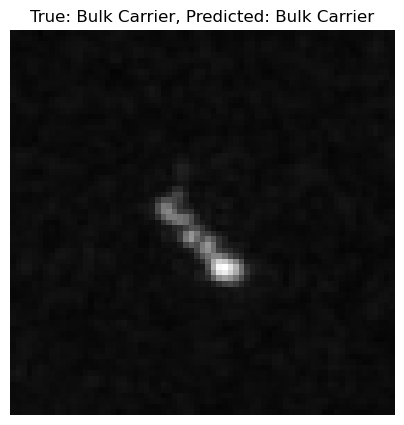

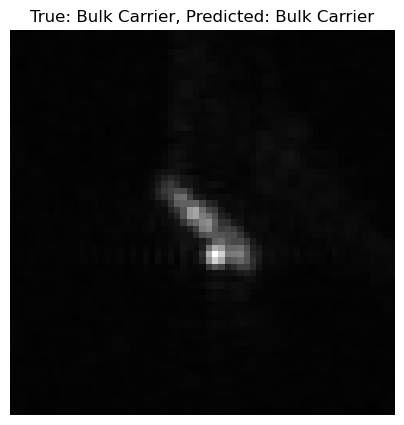

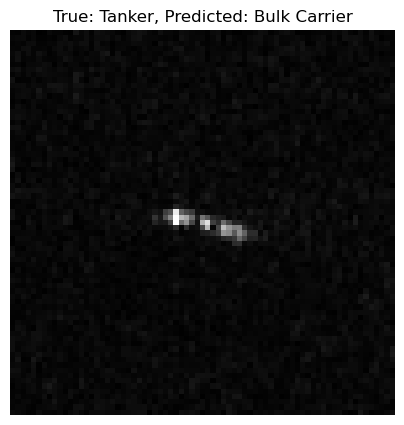

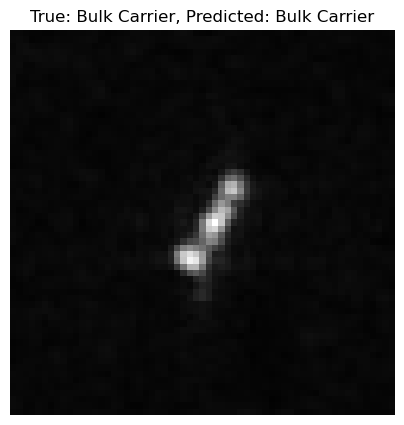

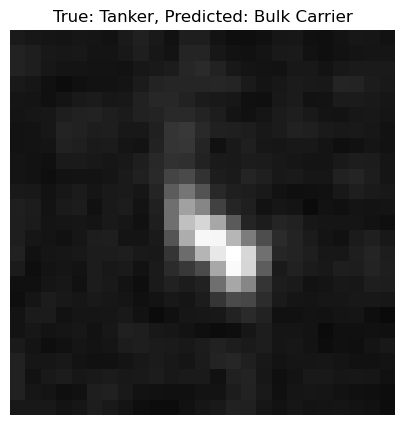

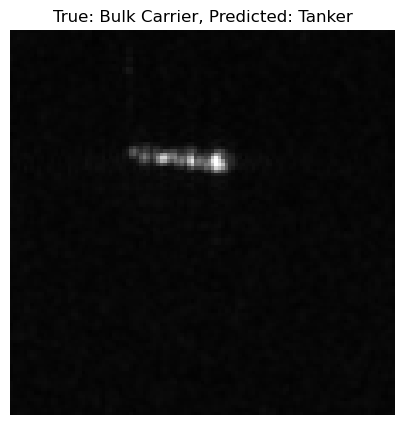

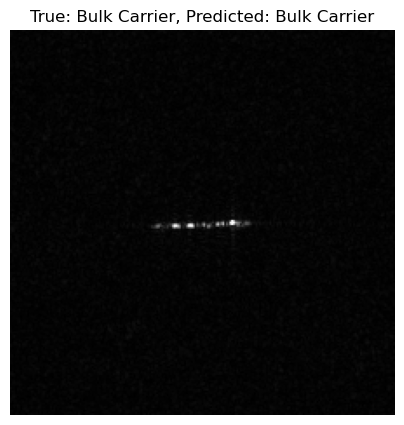

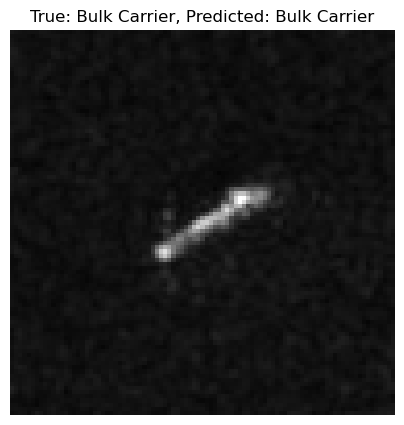

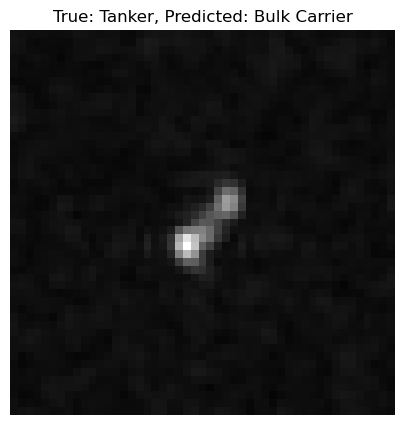

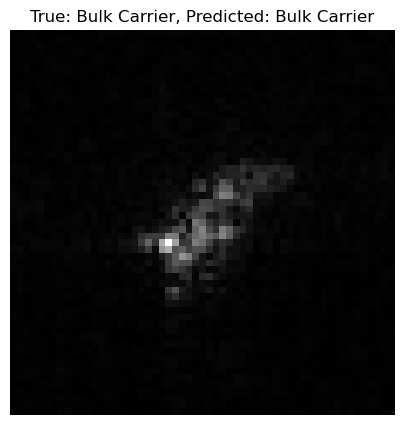

In [16]:
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

# Randomly select a few images
samples = random.sample(range(len(predictions)), 10)

for i in samples:
    img_path = os.path.join(image_base_path, test_df.iloc[i]['image_1'])
    img = load_img(img_path)
    true_label = true_categories[i]
    predicted_label = predictions[i]
    
    plt.figure(figsize=(5, 5))
    plt.imshow(img, cmap='gray')
    plt.title(f'True: {true_label}, Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()


In [17]:
from collections import Counter

prediction_counts = Counter(predictions)
print(prediction_counts)


Counter({'Bulk Carrier': 1142, 'Tanker': 184})


In [18]:
test_df = pd.read_csv(os.path.join(os.getcwd(), 'Split_Tanker_Bulk_Container_frugal_vv/test.csv'))
predictions = []
true_categories = []

for index, row in test_df.iterrows():
    # img1_path = os.path.join('OpenSARShip/Categories', row['image_1'])
    img1_path = os.path.join(os.path.abspath('../OpenSARShip/Categories'), row['file_path'])
    img1_category = get_category_from_path(row['file_path'])
    img1 = load_and_preprocess_image(img1_path)
    
    predicted_category = classify_test_image(img1, siamese_network.model, reference_images)
    
    predictions.append(predicted_category)
    true_categories.append(img1_category)

1/1 [==============================] - 0s 25ms/step


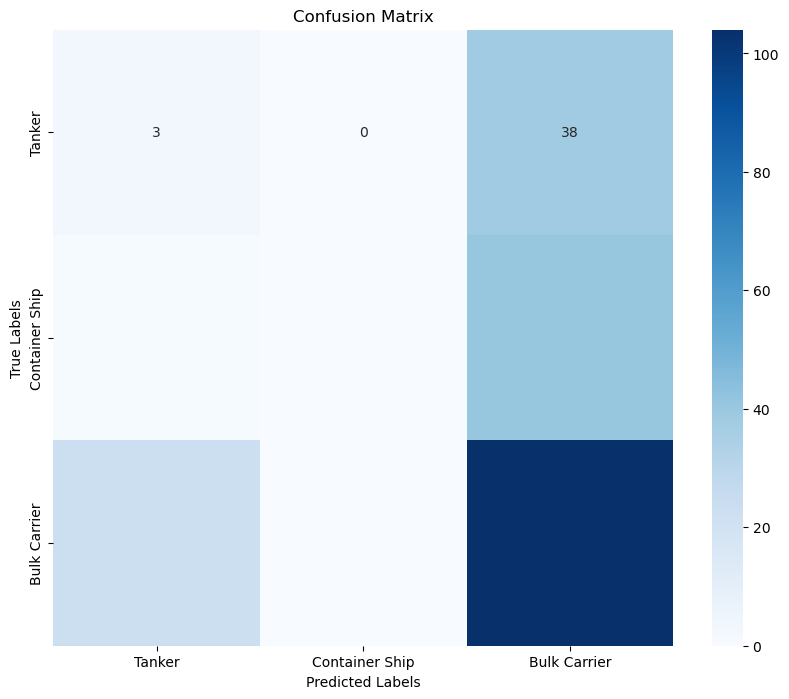

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


conf_matrix = confusion_matrix(true_categories, predictions, labels=list(reference_images.keys()))
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=list(reference_images.keys()), yticklabels=list(reference_images.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [20]:
print(classification_report(true_categories, predictions, target_names=list(reference_images.keys())))

                precision    recall  f1-score   support

        Tanker       0.57      0.82      0.67       127
Container Ship       0.00      0.00      0.00        42
  Bulk Carrier       0.11      0.07      0.09        41

      accuracy                           0.51       210
     macro avg       0.23      0.30      0.25       210
  weighted avg       0.37      0.51      0.42       210



c:\Users\Julia\anaconda3\envs\tensorflow_new\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Julia\anaconda3\envs\tensorflow_new\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Julia\anaconda3\envs\tensorflow_new\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

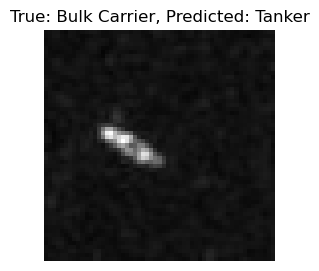

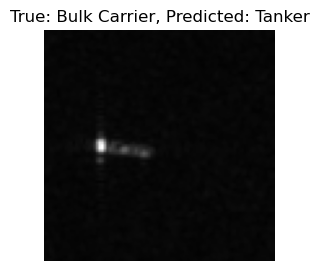

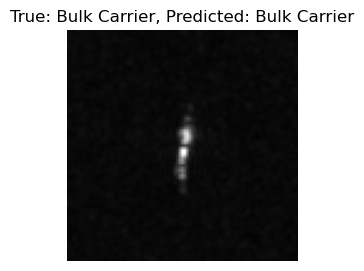

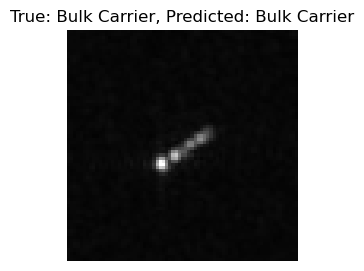

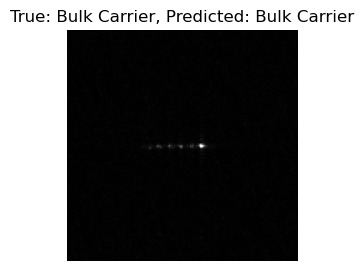

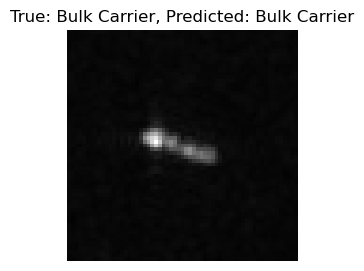

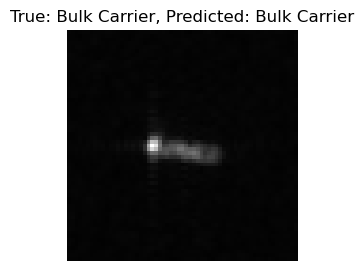

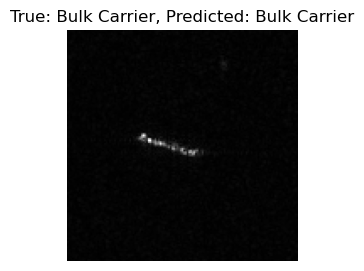

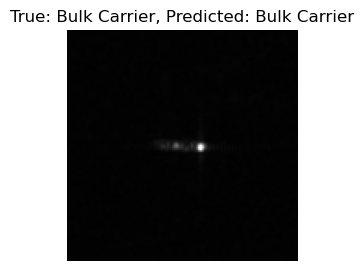

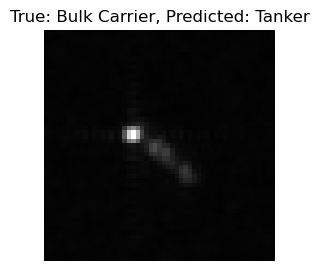

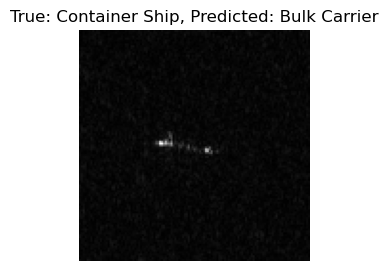

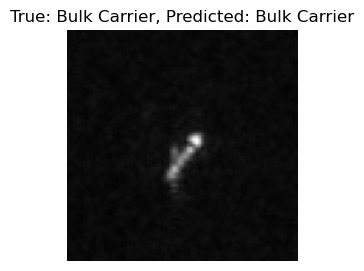

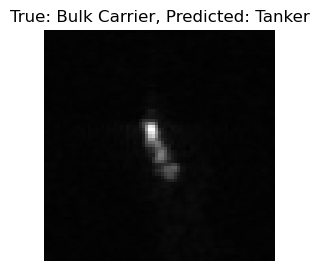

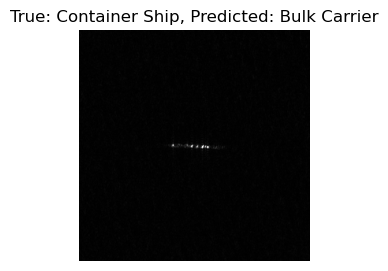

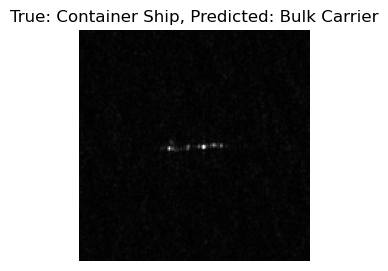

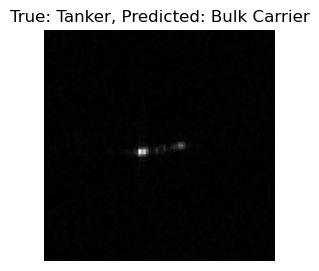

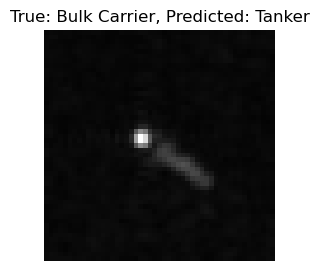

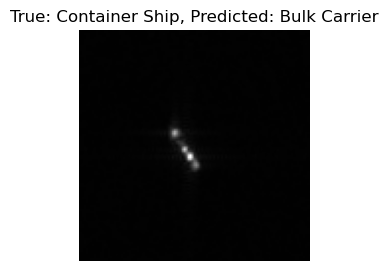

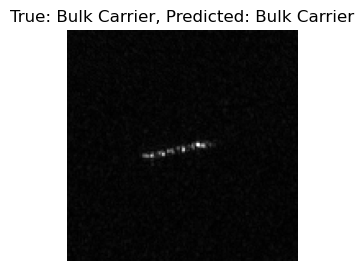

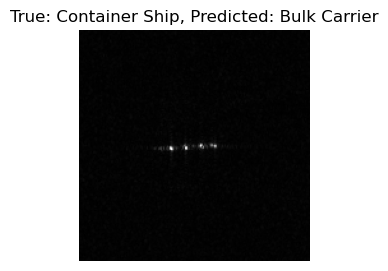

In [21]:
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

# Randomly select a few images
samples = random.sample(range(len(predictions)), 20)

for i in samples:
    img_path = os.path.join(image_base_path, test_df.iloc[i]['file_path'])
    img = load_img(img_path)
    true_label = true_categories[i]
    predicted_label = predictions[i]
    
    plt.figure(figsize=(3, 3))
    plt.imshow(img, cmap='gray')
    plt.title(f'True: {true_label}, Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()

In [22]:
from collections import Counter

prediction_counts = Counter(predictions)
print(prediction_counts)

Counter({'Bulk Carrier': 183, 'Tanker': 27})
